<a href="https://colab.research.google.com/github/Becode-turing-5-30/flood-sound-detection/blob/main/start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup for connecting Google Colab -> Google Drive -> GitHub

In [1]:
# Mount your Google Drive
from google.colab import drive # import drive from google colab
from os.path import join  

ROOT = '/content/drive'     # default for the drive in colab
MY_GOOGLE_DRIVE_PATH = 'My Drive/ML-Projects/flood-sound-detection' # path to your project on Google Drive

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print("PROJECT_PATH: ", PROJECT_PATH) 

drive.mount(ROOT)           # we mount the drive

PROJECT_PATH:  /content/drive/My Drive/ML-Projects/flood-sound-detection
Mounted at /content/drive


In [2]:
# GitHub Repository setup

# API KEY from json
import json
ENV_JSON_PATH = f'{ROOT}/My Drive/ML-Projects/env.json' # replace with the path with your json with token api
with open(ENV_JSON_PATH) as f:
  r = json.load(f)
  my_token = r["TOKEN"]

# GIT
GIT_USERNAME = "Becode-turing-5-30"                     # replace with your Github username 
GIT_TOKEN = my_token
GIT_REPOSITORY = "flood-sound-detection"                # Replace with your github repository in this case we want 

GIT_PATH = f"https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git"

In [3]:
%cd {PROJECT_PATH}
%pwd

/content/drive/My Drive/ML-Projects/flood-sound-detection


'/content/drive/My Drive/ML-Projects/flood-sound-detection'

# Git Clone

In [ ]:
# GIT CLONE on mounted Google drive if not done yet.
%cd {PROJECT_PATH}
!git clone "{GIT_PATH}" . # clone the github repository

/content/drive/My Drive/ML-Projects/flood-sound-detection
fatal: destination path '.' already exists and is not an empty directory.


In [ ]:
# Change to current project directory
%cd {PROJECT_PATH} 

/content/drive/My Drive/ML-Projects/flood-sound-detection


# Git Pull

In [ ]:
!git fetch
!git pull origin main

From https://github.com/Becode-turing-5-30/flood-sound-detection
 * branch            main       -> FETCH_HEAD
Already up to date.


# GitHub useful commands

In [31]:
# Check statuses of the files that changed
!git status 

On branch dl2drive
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   youtube-extraction.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	URL/df_10.csv
	URL/df_1416.csv
	URL/test.csv
	start_ytextraction.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
# Create branch and checkout
!git checkout -b dl2drive 

M	start_here.ipynb
Switched to a new branch 'dl2drive'


In [ ]:
# checkout
!git checkout main --force

Switched to branch 'main'
Your branch is behind 'origin/main' by 17 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)


# GitHub commit changes and push

In [32]:
# Add / track changed files
!git add -u

In [ ]:
# Commit the changes
!git config --global user.email "kethien.ng@gmail.com"
!git config --global user.name "KeThien"
!git commit -m '"Commit from colab: yt extraction - "'

[dl2drive 1b9770c] "Commit from colab: yt extraction"
 1 file changed, 6 insertions(+), 12 deletions(-)


In [ ]:
# Push the changes to GitHub Repository
!git push origin dl2drive

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 407 bytes | 407.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/Becode-turing-5-30/flood-sound-detection.git
   45f1fb1..1b9770c  dl2drive -> dl2drive


# Dataframe process to shuffle chunk

In [5]:
# imports
import pandas as pd

In [ ]:
%cd {PROJECT_PATH}

/content/drive/My Drive/ML-Projects/flood-sound-detection


In [7]:
df = pd.read_csv('URL/database_final.csv')

In [ ]:
df['label1'].value_counts()

rain          3018
speech        1124
stream        1094
waterfall      806
ecoulement     162
splash          44
vehicule        29
boat            26
wave            20
ocean           17
animal           3
bain             1
robinet          1
Name: label1, dtype: int64

In [9]:
df1 = df.sample(frac=0.2, random_state=1)
df1['label2'].value_counts()
df1
df1.head(10).to_csv('URL/df_10.csv', index=False)

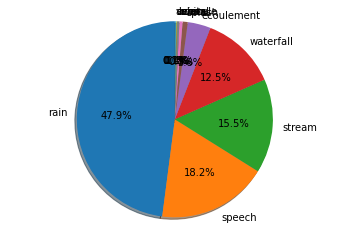

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df1['label1'].value_counts().index
sizes = df1['label1'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Launch Script to DL wav from youtube

In [10]:
# Setup package
!pip install youtube-dl

     |████████████████████████████████| 1.9 MB 14.6 MB/s 


In [30]:
!python youtube-extraction.py

           url  ...  label4
0  7Cv7C_6KxEs  ...     NaN
1  aDofvBPJJFo  ...     NaN
2  DWmLuZ5s3KQ  ...     NaN
3  i4eFb5Z0wis  ...     NaN
4  36ac6OBbdZM  ...     NaN

[5 rows x 7 columns]
https://youtu.be/7Cv7C_6KxEs
['stream', nan, nan, nan]
stream-0
file already exists
https://youtu.be/aDofvBPJJFo
['speech', 'waterfall', 'stream', nan]
stream-speech-waterfall-1
file already exists
https://youtu.be/DWmLuZ5s3KQ
['wave', 'waterfall', nan, nan]
waterfall-wave-2
file already exists
https://youtu.be/i4eFb5Z0wis
['waterfall', nan, nan, nan]
waterfall-3
file already exists
https://youtu.be/36ac6OBbdZM
['rain', 'orage', 'orage', nan]
orage-rain-4
file already exists
https://youtu.be/rG3bZ91UFq4
['rain', 'orage', 'orage', 'rain']
orage-rain-5
file already exists
https://youtu.be/wDKWdZfgT1E
['rain', 'orage', nan, nan]
orage-rain-6
file already exists
https://youtu.be/9R65rxs492w
[nan, 'speech', 'stream', nan]
stream-speech-7
file already exists
https://youtu.be/6QmXVgqNchI
['stream', nan, na